# Exploratory Data Analysis

## Introduction

The purpose of this EDA is to gain insights into the Washington, DC real estate market. We will analyze key property attributes such as price, number of bedrooms, bathrooms, area (square footage), and status type (e.g., for sale or sold). Our goal is to uncover patterns, trends, and relationships among these features to understand the dynamics of the market better. Additionally, the findings will guide the development of a real estate chatbot that uses the dataset for client engagement, follow-up, and recommendations.



### Import and Load the Dataset

In [4]:
#Imports
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import f_oneway
from scipy.stats import pearsonr

In [5]:
#Loading the Clean & Transformed Data
path = ('../data/cleaned_real_estate_data.csv')
real_estate_data = pd.read_csv(path)

In [6]:
real_estate_data.head()

,address,price,beds,baths,area,zpid,id,detailUrl,marketingStatusSimplifiedCd,builderName,...,isZillowOwned,beds_missing,baths_missing,area_missing,lotArea_acres,latitude,longitude,builderName_encoded,price_per_sq_ft,price_range
0,"2600 13th Rd S APT 392, Arlington, VA 22204",0.146970,2.0,2.0,0.083538,12103562,12103562,https://www.zillow.com/homedetails/2600-13th-R...,coming_soon,NaN,...,0,0,0,0,0.0,38.859770,-77.08375,91,446.593002,Low
1,"1541 N Carolina Ave NE, Washington, DC 20002",0.348485,3.0,4.0,0.195385,425748,425748,https://www.zillow.com/homedetails/1541-N-Caro...,for_sale_by_agent,NaN,...,0,0,0,0,0.0,38.892773,-76.98295,91,452.755906,High
2,"5348 29th St NW, Washington, DC 20015",0.362121,4.0,4.0,0.160692,458388,458388,https://www.zillow.com/homedetails/5348-29th-S...,coming_soon,NaN,...,0,0,0,0,0.0,38.960190,-77.05902,91,572.044040,High
3,"36 Channing St NW #A, Washington, DC 20001",0.129061,3.0,2.0,0.369231,344613704,344613704,https://www.zillow.com/homedetails/36-Channing...,for_sale_by_agent,NaN,...,0,0,0,0,0.0,38.922190,-77.01049,91,88.729167,Low
4,"4100 W W St NW #411, Washington, DC 20007",0.098485,2.0,1.0,0.055923,351580057,351580057,https://www.zillow.com/homedetails/4100-W-W-St...,for_sale_by_agent,NaN,...,0,0,0,0,0.0,38.919340,-77.08196,91,447.042641,Low


### Descriptive Analysis Questions
A series of questions designed to explore distributions, central tendencies, and basic patterns in the data. The questions we will be answering are:
1. What is the distribution of property prices?
2. How do the number of bedrooms and bathrooms influence property prices?
3. What is the distribution of property sizes (area)?
4. How does the property status type (e.g., for sale, sold) vary across price ranges?
5. Are properties built by specific builders more expensive on average?
6. Are there properties with undisclosed addresses, and how do they differ in price or size?


### Descriptive Statistics
To showcase the descriptive statistics we can use the .describe method to answer a few questions and take a look at distribution among items.


In [7]:
real_estate_data.describe()

,price,beds,baths,area,zpid,id,isUndisclosedAddress,isZillowOwned,beds_missing,baths_missing,area_missing,lotArea_acres,latitude,longitude,builderName_encoded,price_per_sq_ft
count,4869.000000,4869.000000,4869.000000,4869.000000,4.869000e+03,4.869000e+03,4869.0,4869.0,4869.0,4869.0,4869.0,4869.000000,4869.000000,4869.000000,4869.000000,4.869000e+03
mean,0.301184,3.199220,2.926063,0.140980,3.740015e+08,3.740015e+08,0.0,0.0,0.0,0.0,0.0,0.014799,38.912984,-77.066775,90.171288,3.040844e+03
std,0.239679,1.840316,1.677549,0.119165,6.819321e+08,6.819321e+08,0.0,0.0,0.0,0.0,0.0,0.316387,0.057254,0.106117,11.974733,4.415184e+04
min,0.000000,0.000000,0.000000,0.000000,3.941090e+05,3.941090e+05,0.0,0.0,0.0,0.0,0.0,0.000000,38.775900,-77.501070,0.000000,0.000000e+00
25%,0.128788,2.000000,2.000000,0.064000,1.208659e+07,1.208659e+07,0.0,0.0,0.0,0.0,0.0,0.000000,38.879480,-77.117290,91.000000,3.273810e+02
50%,0.212091,3.000000,3.000000,0.109308,5.978670e+07,5.978670e+07,0.0,0.0,0.0,0.0,0.0,0.000000,38.908543,-77.036150,91.000000,4.492754e+02
75%,0.393939,4.000000,4.000000,0.176923,3.400428e+08,3.400428e+08,0.0,0.0,0.0,0.0,0.0,0.000000,38.941990,-76.996830,91.000000,6.249107e+02
max,1.000000,28.000000,14.000000,1.000000,2.146490e+09,2.146490e+09,0.0,0.0,0.0,0.0,0.0,18.030000,39.093440,-76.865920,146.000000,2.850000e+06


## Answering the Descriptive Analysis Questions

### What is the distribution of property prices?


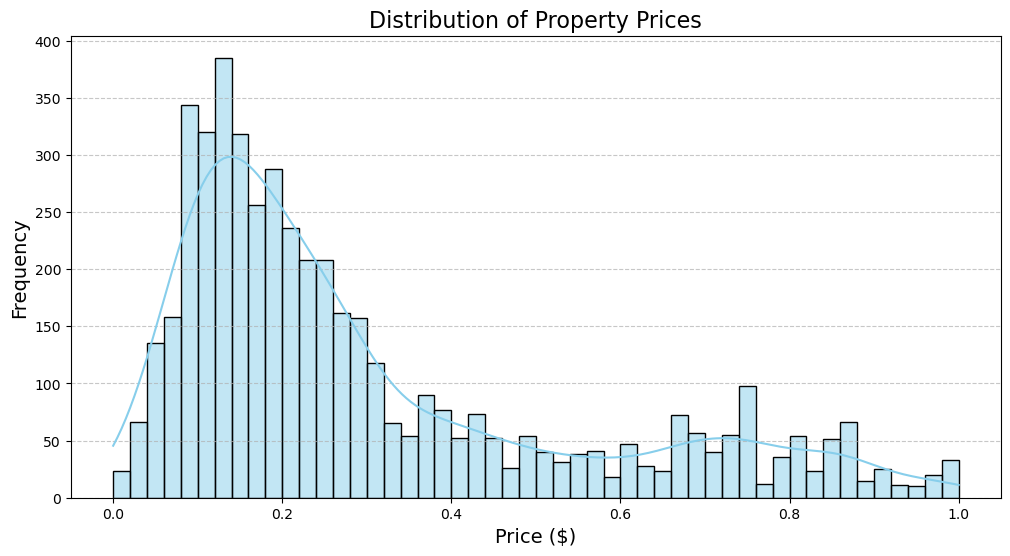

In [8]:
# Plotting the distribution of property prices
plt.figure(figsize=(12, 6))
sns.histplot(real_estate_data['price'], bins=50, kde=True, color='skyblue')
plt.title('Distribution of Property Prices', fontsize=16)
plt.xlabel('Price ($)', fontsize=14)
plt.ylabel('Frequency', fontsize=14)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()


### How do the number of bedrooms and bathrooms influence property prices?

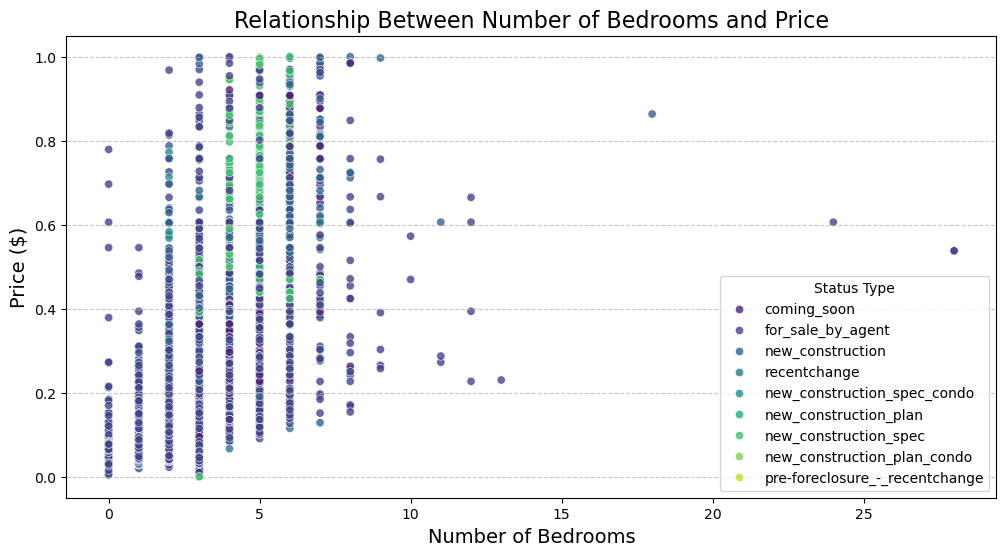

In [9]:
# Scatter plot for price vs. bedrooms
plt.figure(figsize=(12, 6))
sns.scatterplot(data=real_estate_data, x='beds', y='price', hue='marketingStatusSimplifiedCd', palette='viridis', alpha=0.8)
plt.title('Relationship Between Number of Bedrooms and Price', fontsize=16)
plt.xlabel('Number of Bedrooms', fontsize=14)
plt.ylabel('Price ($)', fontsize=14)
plt.legend(title='Status Type')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()


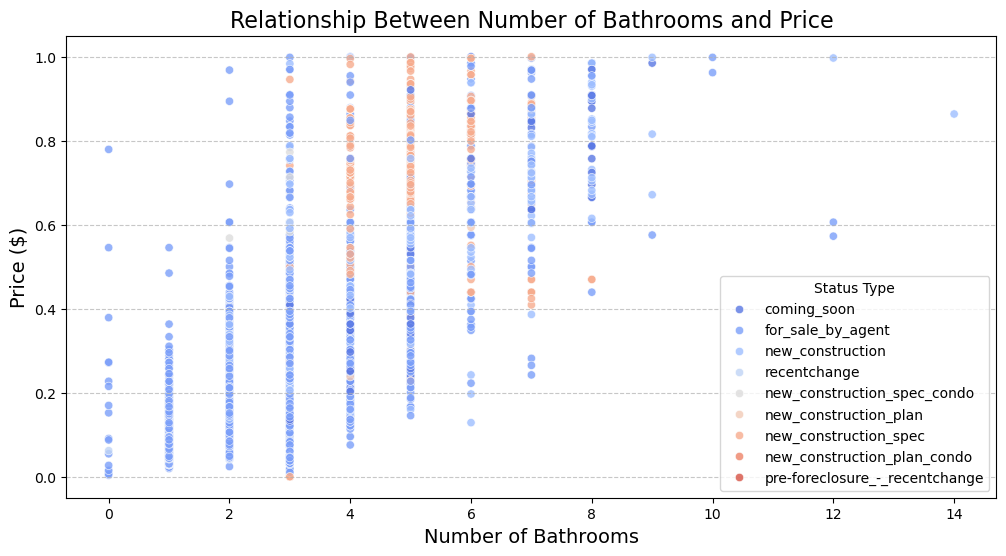

In [10]:

# Scatter plot for price vs. bathrooms
plt.figure(figsize=(12, 6))
sns.scatterplot(data=real_estate_data, x='baths', y='price', hue='marketingStatusSimplifiedCd', palette='coolwarm', alpha=0.8)
plt.title('Relationship Between Number of Bathrooms and Price', fontsize=16)
plt.xlabel('Number of Bathrooms', fontsize=14)
plt.ylabel('Price ($)', fontsize=14)
plt.legend(title='Status Type')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()


### What is the distribution of property sizes (area)?

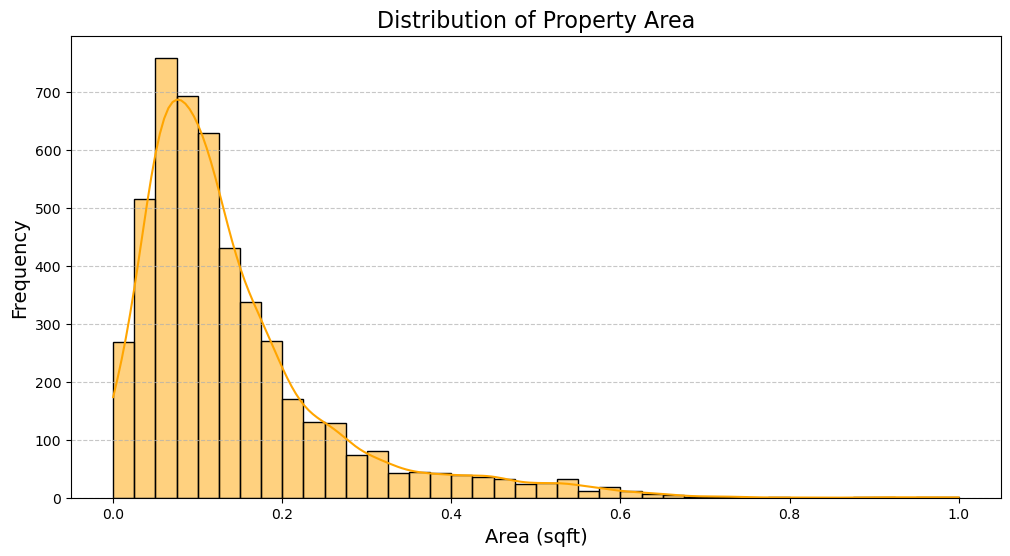

In [11]:
# Plotting the distribution of property area
plt.figure(figsize=(12, 6))
sns.histplot(real_estate_data['area'], bins=40, kde=True, color='orange')
plt.title('Distribution of Property Area', fontsize=16)
plt.xlabel('Area (sqft)', fontsize=14)
plt.ylabel('Frequency', fontsize=14)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()


### How does property status type vary across price ranges?

/var/folders/p9/l56kxrqj1f50k63kvkm8k0nm0000gp/T/ipykernel_27267/1358872892.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=real_estate_data, x='marketingStatusSimplifiedCd', y='price', palette='Set2')


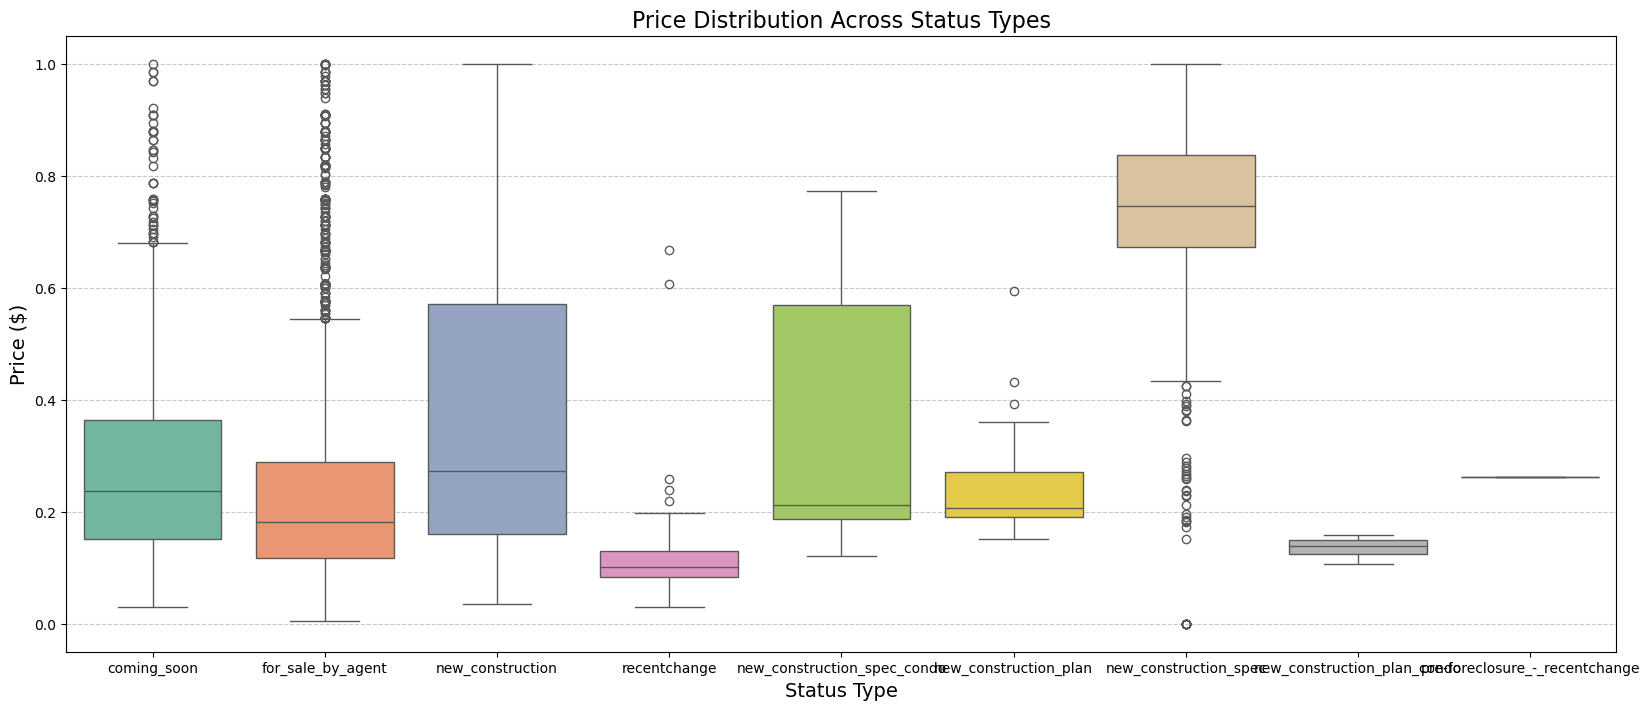

In [12]:
# Box plot for price vs. statusType
plt.figure(figsize=(20, 8))
sns.boxplot(data=real_estate_data, x='marketingStatusSimplifiedCd', y='price', palette='Set2')
plt.title('Price Distribution Across Status Types', fontsize=16)
plt.xlabel('Status Type', fontsize=14)
plt.ylabel('Price ($)', fontsize=14)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()


### Are properties built by specific builders more expensive on average?

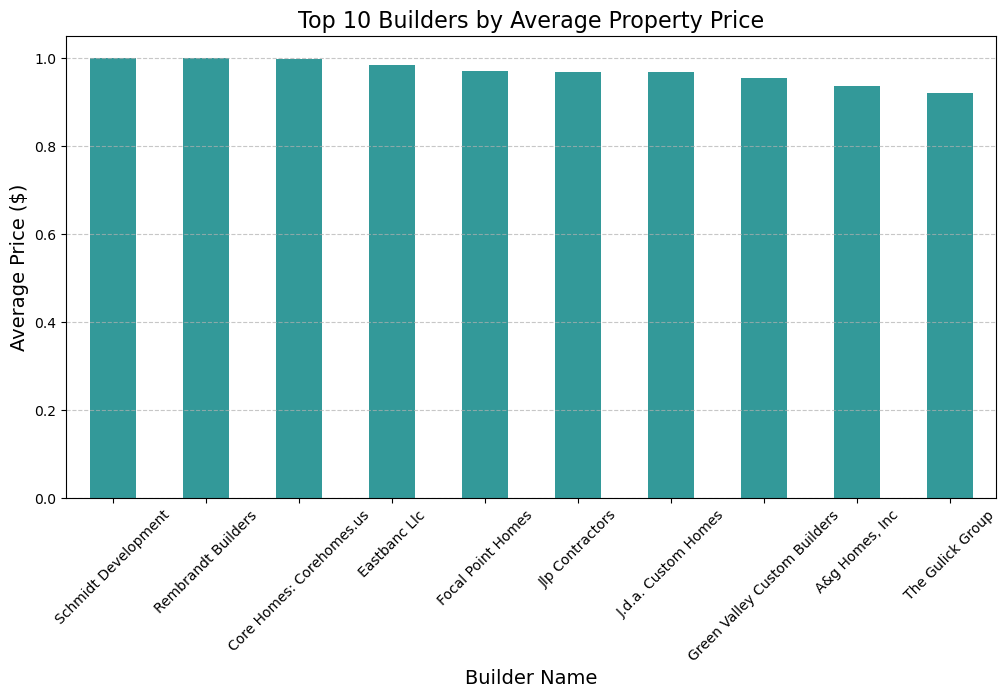

In [13]:
# Grouping by builderName and calculating average price
builder_avg_price = real_estate_data.groupby('builderName')['price'].mean().sort_values(ascending=False).head(10)

# Bar plot for average price by builder
plt.figure(figsize=(12, 6))
builder_avg_price.plot(kind='bar', color='teal', alpha=0.8)
plt.title('Top 10 Builders by Average Property Price', fontsize=16)
plt.xlabel('Builder Name', fontsize=14)
plt.ylabel('Average Price ($)', fontsize=14)
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()


### Are there properties with undisclosed addresses, and how do they differ in price or size?


/var/folders/p9/l56kxrqj1f50k63kvkm8k0nm0000gp/T/ipykernel_27267/1458226722.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=real_estate_data, x='isUndisclosedAddress', y='price', palette='cool')


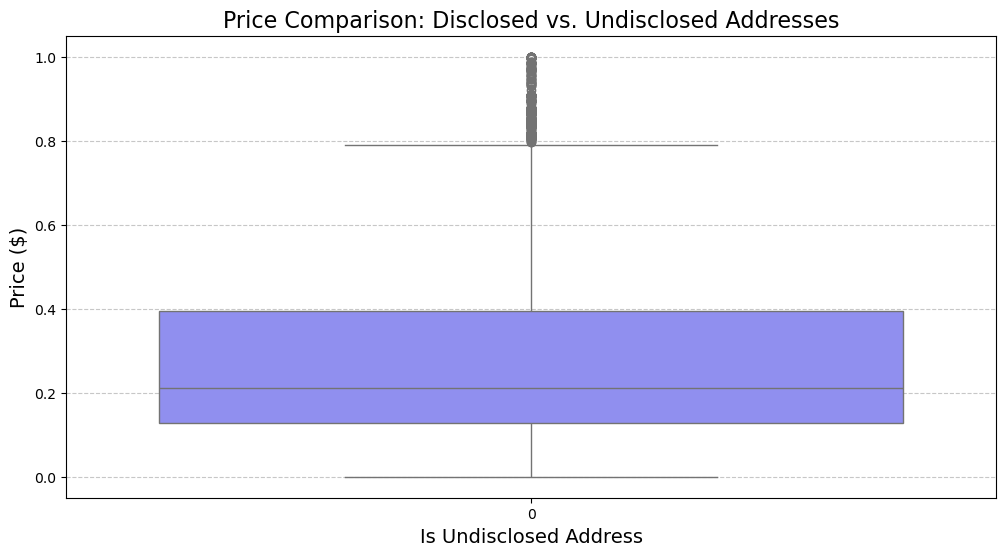

In [14]:
# Filtering data for undisclosed addresses
undisclosed = real_estate_data[real_estate_data['isUndisclosedAddress'] == True]

# Comparing price and area for undisclosed vs. disclosed addresses
plt.figure(figsize=(12, 6))
sns.boxplot(data=real_estate_data, x='isUndisclosedAddress', y='price', palette='cool')
plt.title('Price Comparison: Disclosed vs. Undisclosed Addresses', fontsize=16)
plt.xlabel('Is Undisclosed Address', fontsize=14)
plt.ylabel('Price ($)', fontsize=14)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()


# Inferential Analysis

### Inferential Analysis Questions
- Is There a Significant Difference in Prices Based on the Number of Bedrooms?
- Is There a Correlation Between Property Size and Price?

### Is There a Significant Difference in Prices Based on the Number of Bedrooms?
Hypotheses:
- Null Hypothesis: There is no significant difference in price across properties with different numbers of bedrooms.
- Alternative Hypothesis (𝐻𝐴): There is a significant difference in price across properties with different numbers of bedrooms.


In [16]:

# Perform ANOVA test
groups = [real_estate_data[real_estate_data['beds'] == b]['price'] for b in real_estate_data['beds'].unique() if not np.isnan(b)]
f_stat, p_value = f_oneway(*groups)

print(f"F-Statistic: {f_stat}, P-Value: {p_value}")


F-Statistic: 318.411626015011, P-Value: 0.0


Since the p-value is below 0.05, we reject the null hypothesis and conclude that the number of bedrooms significantly impacts price.

### Is There a Correlation Between Property Size and Price?
Hypotheses:

- Null Hypothesis: There is no correlation between property size (area) and price.
- Alternative Hypothesis: There is a correlation between property size (area) and price.

If the p-value is below 0.05, we reject the null hypothesis and conclude that property size significantly correlates with price.

In [17]:

# Compute Pearson correlation
corr, p_value = pearsonr(real_estate_data['area'], real_estate_data['price'])
print(f"Pearson Correlation: {corr}, P-Value: {p_value}")


Pearson Correlation: 0.4852527662194259, P-Value: 4.095257725463383e-286


### Visualization of Results

#### Boxplot: Price by Number of Bedrooms

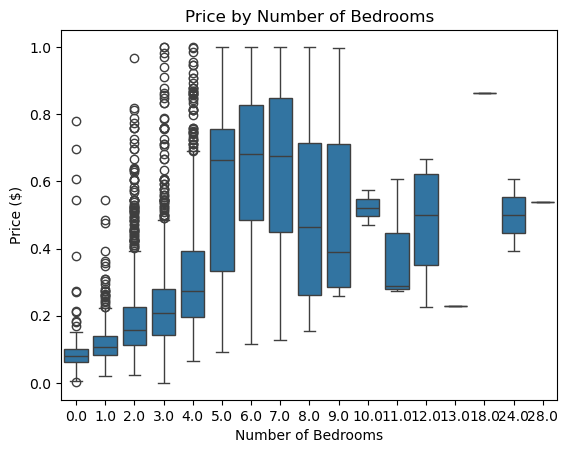

In [18]:
sns.boxplot(x='beds', y='price', data=real_estate_data)
plt.title('Price by Number of Bedrooms')
plt.xlabel('Number of Bedrooms')
plt.ylabel('Price ($)')
plt.show()


#### Regression Plot: Price vs. Area